# Diabetes (clustering)

다음의 당뇨 데이터의 혈압, 당뇨진행 정도 데이터를 이용하여 군집화(clustering)하여라.

1.sklearn을 이용하지 않고 (자신의 코드로)

2.sklearn을 이용해서

3.cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

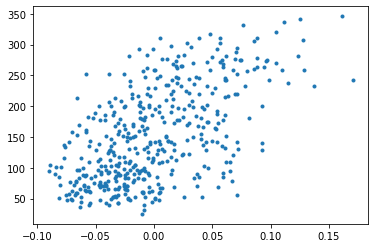

In [14]:
from sklearn import datasets
diabetes=datasets.load_diabetes()
diabetes.keys()
diabetes.DESCR
import numpy as np 
import matplotlib.pyplot as plt

X_p=diabetes.data[:,2] # 혈압
X_d = diabetes.target # 당뇨 진행 정도
plt.plot(X_p,X_d,'.')

# 1.sklearn을 이용하지 않고 (자신의 코드로)

In [15]:
import random

In [16]:
def clusteringf(k,z,n):#(cluster 수,오차범위,최대 실행수)
    cp=[]#초기점
    num=1
    err=0

    #c최새 최소 구하기
    X_pMax=max(X_p)
    X_pMin=min(X_p)

    X_dMax=max(X_d)
    X_dMin=min(X_d)

    for i in range(k):#범위 내에서 랜덤으로 초기값 설정 
        cp.append([(X_pMax-X_pMin)*random.randrange(1,11)/10+X_pMin,(X_dMax-X_dMin)*random.randrange(1,11)/10+X_dMin])
    

    while 1:
        #셈플과 중심점 사이 거리 구하기
        r=[]

        for j in range(len(cp)):
            r.append((X_p-cp[j][0])**2+(X_d-cp[j][1])**2)


        #표본과 가장 가까운 점 찾기
        g = np.array([])

        for j in range(len(r[1])):
            pop=[]
            for i in range(len(cp)):
                pop.append([r[i][j]])
            g= np.append(g,np.argmin(pop))
        if max(g)<k-1:#3점중 1점이 가장 가까운 점이 없을때 발생하는 오류 방지
            print("err:3점중 1점이 가장 가까운 점이 없음>>재실행")
            err=1
            break
            



        #새로운 중심점 위치 구하기
        a=[]
        b=[]
        e=[]

        con=2
        for j in range(len(cp)):
            b.append([np.mean([X_p[i] for i in np.where(g==j)])])
            e.append([np.mean([X_d[i] for i in np.where(g==j)])])
            a.append([np.mean([X_p[i] for i in np.where(g==j)]),
                      np.mean([X_d[i] for i in np.where(g==j)])])

 
        #그래프 데이터 입력
        a_aly=[]
        for j in range(len(cp)):
            a_aly.append([[X_p[i] for i in np.where(g==j)],[X_d[i] for i in np.where(g==j)]])
    

        #시각화
        ndata=[X_p,X_d,g]
        sdata=[b,e]
    
        plt.scatter(ndata[0],ndata[1],c=g)
        plt.scatter(sdata[0],sdata[1],color='red')
    
        plt.show()
        print(cp)
        
        suma=0#중심점 변화의 제곱합
        
        for j in range(len(cp)):
            suma=(a[j][0]-cp[j][0])**2+(a[j][1]-cp[j][1])**2


        if suma<z:#오차범위
            break
        cp=a#값전달 
        num+=1
        if num>n:
            break
    if err==0:
        return num-1
    else:
        return clusteringf(k,z,n)#에러시 반복실행
       
    

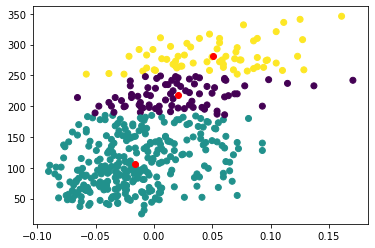

[[-0.012026139334764943, 217.6], [0.06622301722898861, 153.4], [0.1183891216048243, 281.8]]


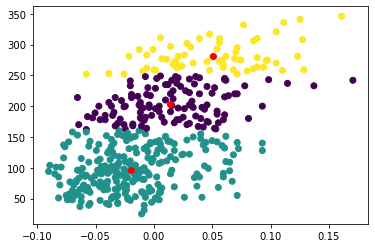

[[0.02063020218474534, 217.36708860759492], [-0.016506654761354586, 106.62751677852349], [0.050603033019822004, 281.4769230769231]]


1

In [17]:
clusteringf(3,0.1,3)#(cluster 수,오차범위,최대 실행수)

# 2.sklearn을 이용해서

In [18]:
from sklearn.cluster import KMeans

In [19]:
km = KMeans(n_clusters =3)
x=[X_p,X_d]
data = np.transpose(x)

In [20]:
km.fit(data)

KMeans(n_clusters=3)

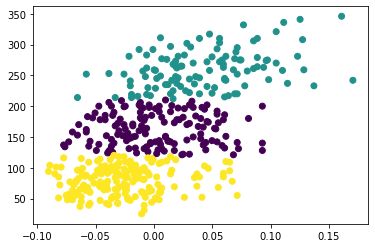

In [21]:
plt.scatter(X_p,X_d,c=km.labels_)

# 3.cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

평균 클러스터링 함수 반복 횟수가 가장 적은 것이 군집화가 가장 잘 되었다고 판단


글러스터링 함수 반복 횟수가 적다->분류하기 쉽다로 생각하고 문제에 접근했다.


In [22]:
def clusteringf2(k,z,n):#(cluster 수,오차범위,최대 실행수) 출력 제거함수
    cp=[]#초기점
    num=1
    err=0

    #c최새 최소 구하기
    X_pMax=max(X_p)
    X_pMin=min(X_p)

    X_dMax=max(X_d)
    X_dMin=min(X_d)

    for i in range(k):#범위 내에서 랜덤으로 초기값 설정 
        cp.append([(X_pMax-X_pMin)*random.randrange(1,11)/10+X_pMin,(X_dMax-X_dMin)*random.randrange(1,11)/10+X_dMin])
    

    while 1:
        #셈플과 중심점 사이 거리 구하기
        r=[]

        for j in range(len(cp)):
            r.append((X_p-cp[j][0])**2+(X_d-cp[j][1])**2)


        #표본과 가장 가까운 점 찾기
        g = np.array([])

        for j in range(len(r[1])):
            pop=[]
            for i in range(len(cp)):
                pop.append([r[i][j]])
            g= np.append(g,np.argmin(pop))
        if max(g)<k-1:#3점중 1점이 가장 가까운 점이 없을때 발생하는 오류 방지
            err=1
            break
            



        #새로운 중심점 위치 구하기
        a=[]
        b=[]
        e=[]

        con=2
        for j in range(len(cp)):
            b.append([np.mean([X_p[i] for i in np.where(g==j)])])
            e.append([np.mean([X_d[i] for i in np.where(g==j)])])
            a.append([np.mean([X_p[i] for i in np.where(g==j)]),
                      np.mean([X_d[i] for i in np.where(g==j)])])

 
        #그래프 데이터 입력
        a_aly=[]
        for j in range(len(cp)):
            a_aly.append([[X_p[i] for i in np.where(g==j)],[X_d[i] for i in np.where(g==j)]])
    
        
        suma=0#중심점 변화의 제곱합
        
        for j in range(len(cp)):
            suma=(a[j][0]-cp[j][0])**2+(a[j][1]-cp[j][1])**2


        if suma<z:#오차범위
            break
        cp=a#값전달 
        num+=1
        if num>n:
            break
    if err==0:
        return num-1
    else:
        return clusteringf2(k,z,n)#에러시 반복실행
       
    

In [29]:
for j in range(2, 15):# 주의 엄청 오래걸림 
    ksum=0
    for i in range(100):
        ksum+=clusteringf2(j,0.1,30)
    print("cluster 수=",j,"반복횟수:",ksum)


cluster 수= 2 반복횟수: 623
cluster 수= 3 반복횟수: 935
cluster 수= 4 반복횟수: 996
cluster 수= 5 반복횟수: 828
cluster 수= 6 반복횟수: 716
cluster 수= 7 반복횟수: 681
cluster 수= 8 반복횟수: 724
cluster 수= 9 반복횟수: 531
cluster 수= 10 반복횟수: 458
cluster 수= 11 반복횟수: 362
cluster 수= 12 반복횟수: 307
cluster 수= 13 반복횟수: 211
cluster 수= 14 반복횟수: 225


클러스터 수가 증가할수록 반복횟수는 적어졌지만 연산속도가 느려졌다

클러스터 수가 늘어날수록 반복횟수도 늘어날 것으로 생각했으나
반복 횟수는 계속 감소했다.

어느정도 지점에서 최소점이 나올줄 알았는데 최대점이 나왔다.

실제로 클러스터 수가 4일때 평균적으로 가장 여러번 반복 실행을 한다

가장 분류하기 모호 하기 때문에 그럴 것이라고 생각한다.


클러스터 수가 10개인걸 보면 전보다 뭔가 규칙성이 보이는 것 같기도 하다.
실제로 유효한 분류 인지는 모르겠다.

In [24]:
def clusteringf3(k,z,n):#(cluster 수,오차범위,최대 실행수) 중간과정 생략 함수
    cp=[]#초기점
    num=1
    err=0

    #c최새 최소 구하기
    X_pMax=max(X_p)
    X_pMin=min(X_p)

    X_dMax=max(X_d)
    X_dMin=min(X_d)

    for i in range(k):#범위 내에서 랜덤으로 초기값 설정 
        cp.append([(X_pMax-X_pMin)*random.randrange(1,11)/10+X_pMin,(X_dMax-X_dMin)*random.randrange(1,11)/10+X_dMin])
    

    while 1:
        #셈플과 중심점 사이 거리 구하기
        r=[]

        for j in range(len(cp)):
            r.append((X_p-cp[j][0])**2+(X_d-cp[j][1])**2)


        #표본과 가장 가까운 점 찾기
        g = np.array([])

        for j in range(len(r[1])):
            pop=[]
            for i in range(len(cp)):
                pop.append([r[i][j]])
            g= np.append(g,np.argmin(pop))
        if max(g)<k-1:#3점중 1점이 가장 가까운 점이 없을때 발생하는 오류 방지
            print("err:3점중 1점이 가장 가까운 점이 없음>>재실행")
            err=1
            break
            



        #새로운 중심점 위치 구하기
        a=[]
        b=[]
        e=[]

        con=2
        for j in range(len(cp)):
            b.append([np.mean([X_p[i] for i in np.where(g==j)])])
            e.append([np.mean([X_d[i] for i in np.where(g==j)])])
            a.append([np.mean([X_p[i] for i in np.where(g==j)]),
                      np.mean([X_d[i] for i in np.where(g==j)])])

 
        #그래프 데이터 입력
        a_aly=[]
        for j in range(len(cp)):
            a_aly.append([[X_p[i] for i in np.where(g==j)],[X_d[i] for i in np.where(g==j)]])
    

        #시각화
        ndata=[X_p,X_d,g]
        sdata=[b,e]
    
     
        
        suma=0#중심점 변화의 제곱합
        
        for j in range(len(cp)):
            suma=(a[j][0]-cp[j][0])**2+(a[j][1]-cp[j][1])**2


        if suma<z:#오차범위
            break
        cp=a#값전달 
        num+=1
        if num>n:
            break
    plt.scatter(ndata[0],ndata[1],c=g)
    plt.scatter(sdata[0],sdata[1],color='red')
    
    plt.show()
    print(cp)
    if err==0:
        return num-1
    else:
        return clusteringf3(k,z,n)#에러시 반복실행
       
    

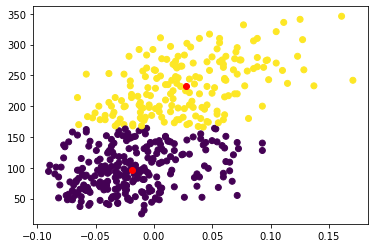

[[-0.01899983027996705, 97.05725190839695], [0.02765530851861673, 232.3]]


6

In [25]:
clusteringf3(2,0.1,30)

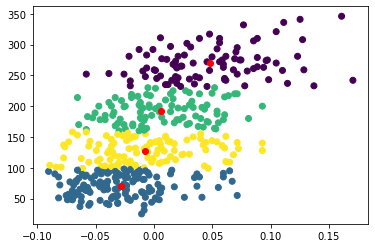

[[0.04763778816372026, 269.25], [-0.02807655746830821, 70.0625], [0.0058408412316314036, 191.04166666666666], [-0.00818520903511682, 127.66363636363636]]


10

In [26]:
clusteringf3(4,0.1,30)

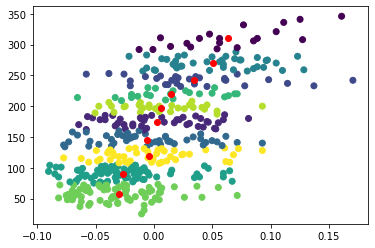

[[0.06358237764798008, 310.9], [0.0029679811907129, 174.62790697674419], [0.03434207940226292, 242.20689655172413], [-0.005487412753220989, 145.5625], [0.05044489999134644, 269.9756097560976], [-0.026123921261127312, 90.44], [0.014319336662445437, 219.04347826086956], [-0.030323584306649127, 58.03529411764706], [0.006440374197727657, 197.76666666666668], [-0.003870694642399638, 119.77083333333333]]


15

In [28]:
clusteringf3(10,0.1,30)